In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных

In [5]:
df = pd.read_csv(r'C:\Users\Anast.Andreeva1\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3\creditcard.csv')

In [6]:
print(df.shape)
print(df.dtypes.value_counts())
print(df.columns.tolist())
print("="*140)
print(df.head())

(284807, 31)
float64    30
int64       1
Name: count, dtype: int64
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.1

# Пропуски

In [7]:
missing_pct = df.isnull().sum() / len(df) * 100
print(missing_pct[missing_pct > 0])

Series([], dtype: float64)


# Основные статистики

In [11]:
# Описательная статистика

print(df.describe().T)

           count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.247012e-15      0.

In [ ]:
print("\n\nКоличество уникальных значений и корреляция:")
print("="*70)
print(f"Уникальные значения в каждой колонке:")
print(df.nunique().head(31))



Количество уникальных значений и корреляция:
Уникальные значения в каждой колонке (первые 5):
Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


In [17]:
print("\n\nСТАТИСТИКА ПО ТРАНЗАКЦИЯМ:")
print("="*70)
print(f"Легальные транзакции (Class=0): {(df['Class']==0).sum()} ({(df['Class']==0).sum()/len(df)*100:.2f}%)")
print(f"Мошенические транзакции (Class=1): {(df['Class']==1).sum()} ({(df['Class']==1).sum()/len(df)*100:.2f}%)")



СТАТИСТИКА ПО ТРАНЗАКЦИЯМ:
Легальные транзакции (Class=0): 284315 (99.83%)
Мошенические транзакции (Class=1): 492 (0.17%)


In [18]:
print("\n\nСРАВНЕНИЕ AMOUNT ПО КЛАССАМ:")
print("="*70)
print(df.groupby('Class')['Amount'].describe())



СРАВНЕНИЕ AMOUNT ПО КЛАССАМ:
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


# Гистограмы

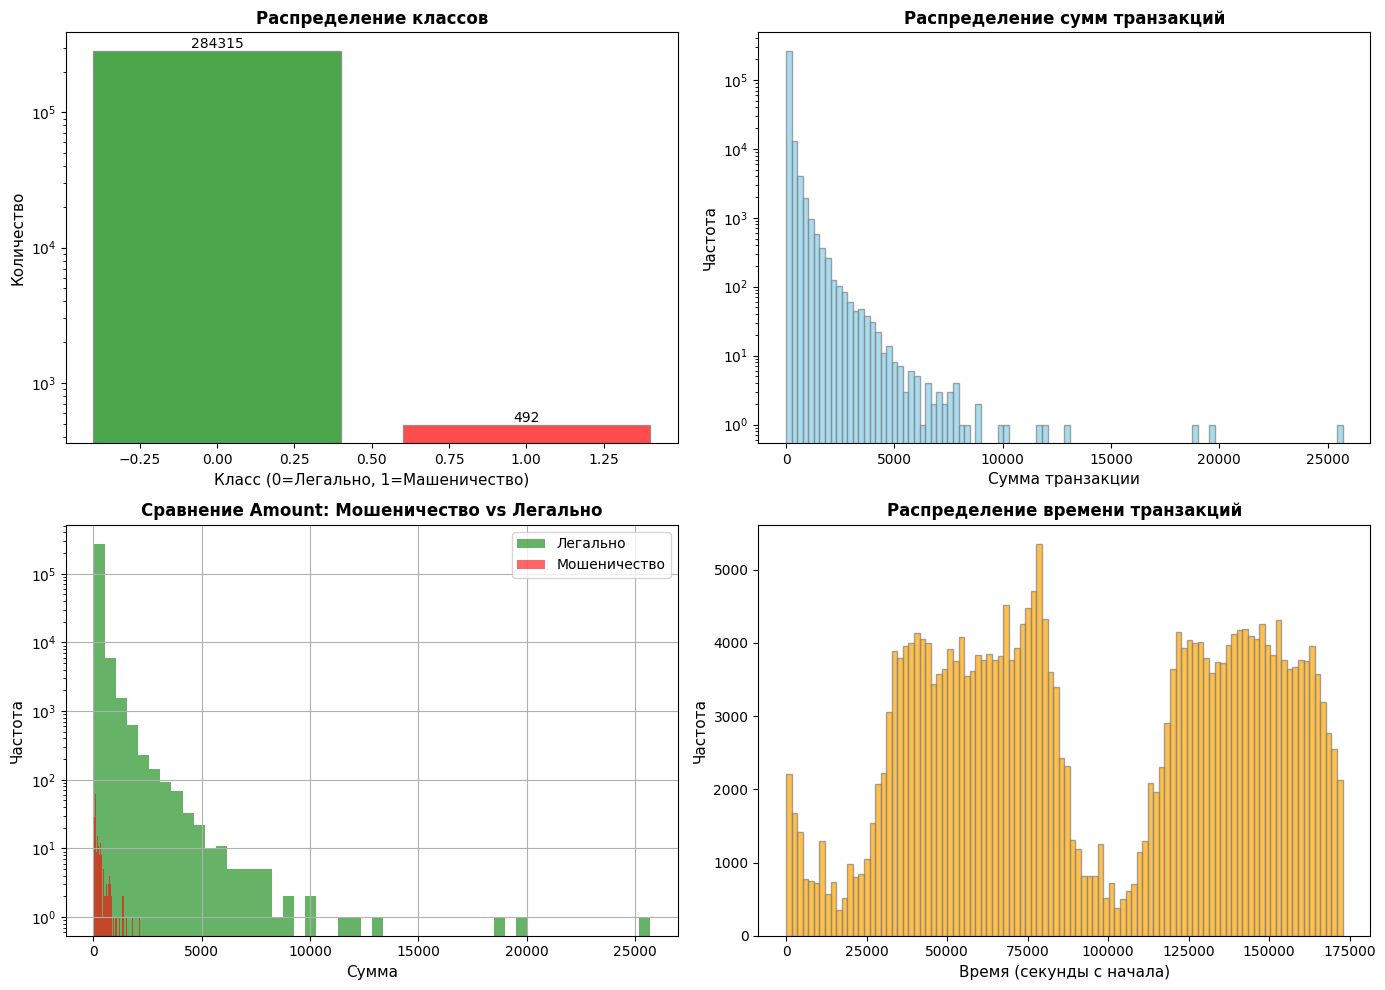

In [32]:
# Распределение целевого класса
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Гистограмма классов
ax1 = axes[0, 0]
class_counts = df['Class'].value_counts()
colors = ['green', 'red']
ax1.bar(class_counts.index, class_counts.values, color=colors, alpha=0.7, edgecolor='grey')
ax1.set_xlabel('Класс (0=Легально, 1=Машеничество)', fontsize=11)
ax1.set_ylabel('Количество', fontsize=11)
ax1.set_title('Распределение классов', fontsize=12, fontweight='bold')
ax1.set_yscale('log')
for i, v in enumerate(class_counts.values):
    ax1.text(i, v, str(v), ha='center', va='bottom')

# 2. Распределение Amount (сумма)
ax2 = axes[0, 1]
ax2.hist(df['Amount'], bins=100, color='skyblue', edgecolor='grey', alpha=0.7)
ax2.set_xlabel('Сумма транзакции', fontsize=11)
ax2.set_ylabel('Частота', fontsize=11)
ax2.set_title('Распределение сумм транзакций', fontsize=12, fontweight='bold')
ax2.set_yscale('log')

# 3. Amount для фродовых vs легальных
ax3 = axes[1, 0]
df[df['Class']==0]['Amount'].hist(bins=50, alpha=0.6, label='Легально', color='green', ax=ax3)
df[df['Class']==1]['Amount'].hist(bins=50, alpha=0.6, label='Мошеничество', color='red', ax=ax3)
ax3.set_xlabel('Сумма', fontsize=11)
ax3.set_ylabel('Частота', fontsize=11)
ax3.set_title('Сравнение Amount: Мошеничество vs Легально', fontsize=12, fontweight='bold')
ax3.legend()
ax3.set_yscale('log')

# 4. Time распределение
ax4 = axes[1, 1]
ax4.hist(df['Time'], bins=100, color='orange', edgecolor='grey', alpha=0.7)
ax4.set_xlabel('Время (секунды с начала)', fontsize=11)
ax4.set_ylabel('Частота', fontsize=11)
ax4.set_title('Распределение времени транзакций', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


# Гистограммы PCA-признаков

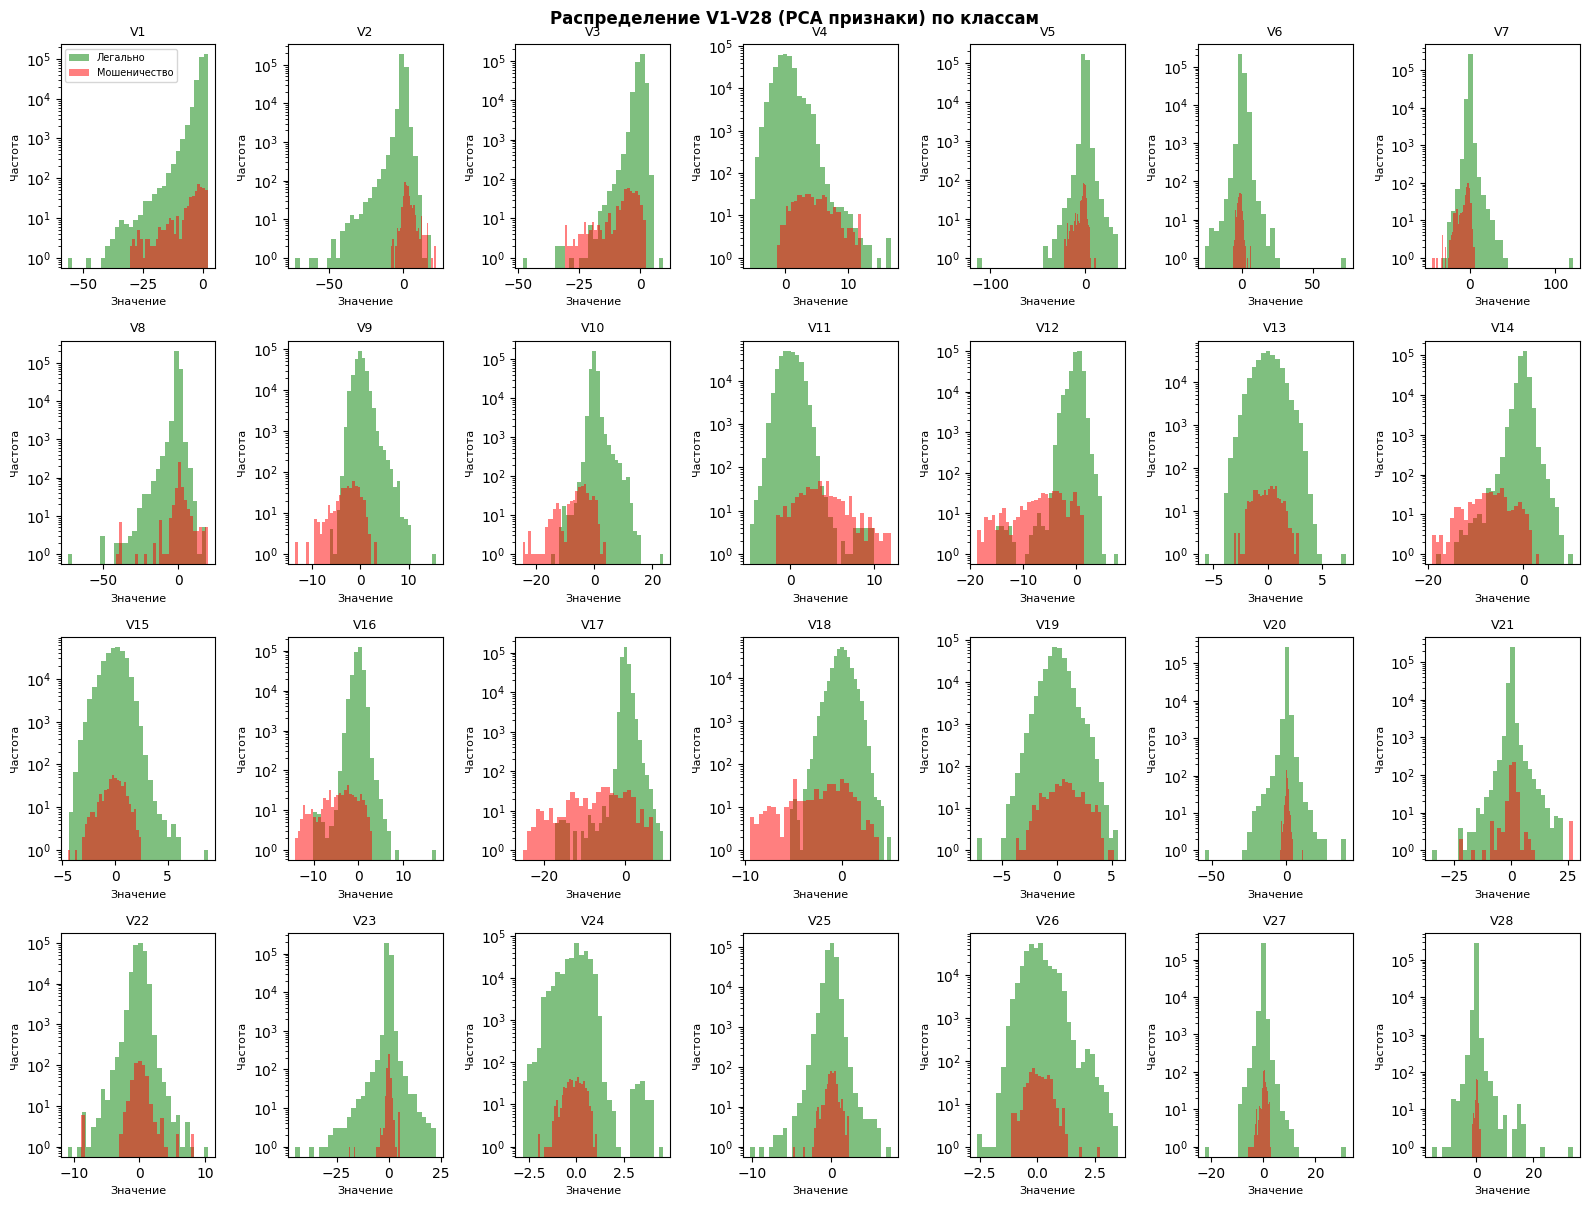

In [39]:
# Признаки V1, V2, … V28 — это главные компоненты, полученные с помощью PCA (из описания)
fig, axes = plt.subplots(4, 7, figsize=(16, 12))
axes = axes.ravel()

for i in range(28):
    ax = axes[i]
    v_col = f'V{i+1}'
    
    # Мошеничество (красный) и Легально (зеленый)
    ax.hist(df[df['Class']==0][v_col], bins=30, alpha=0.5, color='green', label='Легально')
    ax.hist(df[df['Class']==1][v_col], bins=30, alpha=0.5, color='red', label='Мошеничество')
    
    ax.set_title(f'{v_col}', fontsize=9)
    ax.set_xlabel('Значение', fontsize=8)
    ax.set_ylabel('Частота', fontsize=8)
    if i == 0:
        ax.legend(fontsize=7)
    ax.set_yscale('log')

plt.tight_layout()
plt.suptitle('Распределение V1-V28 (PCA признаки) по классам', y=1.001, fontsize=12, fontweight='bold')
plt.show()


# Аномалии

In [50]:
# Подсчет процента аномалий (мошеничество)
total_records = len(df)
fraud_records = df['Class'].sum()
error_rate = (fraud_records / total_records) * 100

print("="*60)
print("ОЦЕНКА ЗАГРЯЗНЕННОСТИ ДАННЫХ")
print("="*60)
print(f"Общее количество транзакций: {total_records:,}")
print(f"Мошенические транзакции (аномалии): {fraud_records:,}")
print(f"Процент аномалий: {error_rate:.4f}%")
print(f"Чистых записей: {100 - error_rate:.4f}%")
print("="*60)


ОЦЕНКА ЗАГРЯЗНЕННОСТИ ДАННЫХ
Общее количество транзакций: 284,807
Мошенические транзакции (аномалии): 492
Процент аномалий: 0.1727%
Чистых записей: 99.8273%


In [51]:
# Экспертные пороги на основе реальной загрязненности
print("\nПОРОГОВЫЕ ЗНАЧЕНИЯ ДЛЯ ОЦЕНКИ МОДЕЛЕЙ")
print("="*50)

# Ожидаемая точность обнаружения (реальная доля мошеничества)
expected_recall_threshold = 0.7  # Минимум 70% машеничества должно быть найдено
expected_precision_threshold = 0.05  # Точность 5%+ при сильном дисбалансе

print(f"Ожидаемый Recall: ≥ {expected_recall_threshold*100}%")
print(f"Ожидаемая Precision: ≥ {expected_precision_threshold*100}%")
print(f"Ожидаемая доля найденных аномалий: ≈{error_rate:.3f}% от всего датасета")



ПОРОГОВЫЕ ЗНАЧЕНИЯ ДЛЯ ОЦЕНКИ МОДЕЛЕЙ
Ожидаемый Recall: ≥ 70.0%
Ожидаемая Precision: ≥ 5.0%
Ожидаемая доля найденных аномалий: ≈0.173% от всего датасета


In [56]:
def data_quality_assessment(df):
    metrics = {}
    
    # 1. Коэффициент ошибок (из Class)
    metrics['Коэффициент ошибок'] = (df['Class'].sum() / len(df)) * 100
    
    # 2. Полнота (нет пропусков)
    metrics['Полнота без пропусков'] = 100.0  # Нет NaN
    
    # 3. Уникальность (дубликаты)
    metrics['Уникальность'] = 100 * (1 - df.duplicated().sum() / len(df))
    
    # 4. Оодинаковые типы
    metrics['Одинаковые типы'] = 100.0  # Все float64/int64
    
    return metrics

quality_metrics = data_quality_assessment(df)
print("ПОЛНАЯ ОЦЕНКА КАЧЕСТВА ДАННЫХ")
print("="*50)
for metric, value in quality_metrics.items():
    status = "✅" if value > 95 else "⚠️" if value > 90 else "❌"
    print(f"{status} {metric}: {value:.2f}%")


ПОЛНАЯ ОЦЕНКА КАЧЕСТВА ДАННЫХ
❌ Коэффициент ошибок: 0.17%
✅ Полнота без пропусков: 100.00%
✅ Уникальность: 99.62%
✅ Одинаковые типы: 100.00%
